In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy 



In [2]:
nnwo = pd.read_csv("/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/nearest_neighbor_wnn_orig.csv")
nnwp = pd.read_csv("/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/nearest_neighbor_wnn_pred.csv")
cell_idents_orig = pd.read_csv("/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/celltype_orig.csv")
cell_idents_pred = pd.read_csv("/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/celltype_orig.csv")

In [3]:
cell_id = {i:cell_idents_orig['x'][i] for i in range(len(cell_idents_orig))}
mat_orig = [['0' for i in range(21)] for j in range(len(cell_id))] 

for i in range(len(cell_id)):
    mat_orig[i][0] = cell_id[i]
    for j in range(20):
        mat_orig[i][j+1] = cell_id[nnwo[nnwo.columns[j+1]][i]-1]
mat_orig

[['Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC',
  'Prog_RBC'],
 ['gdT',
  'CD4 Memory',
  'gdT',
  'CD4 Memory',
  'gdT',
  'gdT',
  'CD4 Memory',
  'gdT',
  'CD4 Memory',
  'CD4 Memory',
  'CD4 Memory',
  'gdT',
  'CD4 Memory',
  'gdT',
  'MAIT',
  'CD4 Memory',
  'MAIT',
  'CD4 Memory',
  'gdT',
  'gdT',
  'gdT'],
 ['CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive',
  'CD4 Naive'],
 ['CD4 Memory',
  'CD4 Memory',
  'CD4 Memory',
  'CD4 Memory',
  'CD4 Memory',
  'CD4 Memory',
  'CD4 Memory',
  'CD4 Memory',
  'CD4

In [4]:
cell_id = {i:cell_idents_pred['x'][i] for i in range(len(cell_idents_pred))}
mat_pred = [['0' for i in range(21)] for j in range(len(cell_id))] 

for i in range(len(cell_id)):
    mat_pred[i][0] = cell_id[i]
    for j in range(20):
        mat_pred[i][j+1] = cell_id[nnwp[nnwp.columns[j+1]][i]-1]


In [5]:
nnr = pd.read_csv("/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/nearest_neighbor_rna.csv").T
nnr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
V1,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC,Prog_RBC
V2,gdT,gdT,CD4 Memory,CD4 Memory,CD4 Naive,CD4 Memory,CD4 Memory,CD4 Naive,CD4 Memory,CD4 Memory,CD8 Naive,CD4 Memory,CD4 Memory,CD4 Naive,CD4 Naive,CD8 Naive,CD8 Naive,CD4 Memory,CD4 Naive,CD4 Memory,CD4 Naive
V3,CD4 Naive,CD4 Naive,CD4 Naive,CD8 Naive,CD8 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD8 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Memory,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Memory,CD4 Naive,CD4 Naive
V4,CD4 Memory,CD4 Memory,CD4 Memory,CD8 Memory_1,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V30668,CD4 Memory,CD4 Memory,CD4 Memory,CD8 Naive,CD4 Memory,CD4 Naive,CD8 Memory_1,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Naive,CD4 Naive,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory,CD4 Memory
V30669,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Memory,CD4 Naive,CD4 Naive,CD4 Memory,CD4 Naive,CD4 Memory,CD4 Naive,CD4 Naive,CD4 Naive,CD8 Naive,CD4 Memory,CD4 Memory,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive
V30670,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono,CD16 Mono
V30671,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Memory,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Memory,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive,CD4 Naive


In [6]:
cell_id.values()

dict_values(['Prog_RBC', 'gdT', 'CD4 Naive', 'CD4 Memory', 'CD14 Mono', 'Naive B', 'CD8 Naive', 'CD14 Mono', 'Naive B', 'CD4 Naive', 'CD8 Naive', 'Prog_RBC', 'CD14 Mono', 'CD8 Naive', 'CD14 Mono', 'CD8 Naive', 'Treg', 'CD8 Effector_2', 'CD14 Mono', 'CD8 Effector_2', 'CD4 Memory', 'CD4 Naive', 'CD14 Mono', 'CD4 Naive', 'CD4 Memory', 'NK', 'CD8 Naive', 'CD4 Naive', 'GMP', 'CD14 Mono', 'Prog_RBC', 'CD8 Effector_1', 'CD4 Memory', 'CD14 Mono', 'CD14 Mono', 'CD8 Naive', 'CD14 Mono', 'CD14 Mono', 'CD4 Memory', 'CD16 Mono', 'GMP', 'GMP', 'CD14 Mono', 'CD4 Memory', 'Prog_RBC', 'CD14 Mono', 'CD4 Memory', 'CD4 Naive', 'NK', 'pDC', 'CD4 Memory', 'CD4 Memory', 'CD4 Naive', 'CD8 Memory_1', 'CD8 Naive', 'CD8 Naive', 'pDC', 'CD14 Mono', 'CD14 Mono', 'CD4 Naive', 'CD16 Mono', 'CD4 Naive', 'MAIT', 'CD8 Naive', 'CD14 Mono', 'Memory B', 'CD14 Mono', 'CD4 Naive', 'CD8 Naive', 'CD14 Mono', 'CD4 Memory', 'Naive B', 'CD14 Mono', 'CD8 Effector_2', 'CD14 Mono', 'CD8 Naive', 'CD8 Naive', 'CD4 Memory', 'CD14 Mono

In [7]:
# Implemented with Pseudocounts
cell_types = list(np.unique(list(cell_id.values())))
cell_tnum = {cell_types[i]: i for i in range(len(cell_types))}
conf_mat_orig = [[0.001 for i in range(len(cell_types))] for j in range(len(cell_types))]
conf_mat_pred = [[0.001 for i in range(len(cell_types))] for j in range(len(cell_types))]
conf_mat_rna = [[0.001 for i in range(len(cell_types))] for j in range(len(cell_types))]
counts = [0.001 for i in range(len(cell_types))]

for item in cell_id.values():
    counts[cell_tnum[item]] += 1
counts = [i/sum(counts) for i in counts]

for i in range(30672):
    index1 = cell_tnum[mat_orig[i][0]]
    for j in range(1,21):
        index2 = cell_tnum[mat_orig[i][j]]
        conf_mat_orig[index1][index2] = conf_mat_orig[index1][index2]+0.05

for i in range(30672):
    index1 = cell_tnum[mat_pred[i][0]]
    for j in range(1,21):
        index2 = cell_tnum[mat_pred[i][j]]
        conf_mat_pred[index1][index2] = conf_mat_pred[index1][index2]+0.05

for i in range(30672):
    index1 = cell_tnum[nnr[0]['V'+str(i+1)]]
    for j in range(1,21):
        index2 = cell_tnum[nnr[j]['V'+str(i+1)]]
        conf_mat_rna[index1][index2] = conf_mat_rna[index1][index2]+0.05

In [8]:
conf_mat_orig = [[conf_mat_orig[i][j]/sum(conf_mat_orig[i]) for j in range(len(cell_types))] for i in range(len(cell_types))]
conf_mat_pred = [[conf_mat_pred[i][j]/sum(conf_mat_pred[i]) for j in range(len(cell_types))] for i in range(len(cell_types))]
conf_mat_rna = [[conf_mat_rna[i][j]/sum(conf_mat_rna[i]) for j in range(len(cell_types))] for i in range(len(cell_types))]


In [9]:
Entropy_orig = {i:0 for i in cell_types}

for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        Entropy_orig[cell_types[i]] -= (conf_mat_orig[i][j]*np.log(conf_mat_orig[i][j]))

Entropy_pred = {i:0 for i in cell_types}
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        Entropy_pred[cell_types[i]] -= conf_mat_pred[i][j]*np.log(conf_mat_pred[i][j])

Entropy_rna = {i:0 for i in cell_types}
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        Entropy_rna[cell_types[i]] -= conf_mat_rna[i][j]*np.log(conf_mat_rna[i][j])

Entropy_random = {i:0 for i in cell_types}
for i in range(len(cell_types)):
    Entropy_random[cell_types[i]] -= counts[i] * np.log(counts[i])

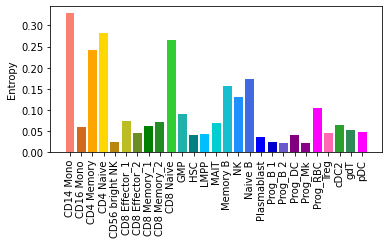

In [10]:
plt.figure(figsize = (5.5,3.5))
plt.bar(cell_types, Entropy_random.values(), color = ("salmon", "chocolate","orange", "gold", "darkgoldenrod", "tab:olive", "olivedrab", "green", "forestgreen", "limegreen", "lightseagreen", "teal", "deepskyblue", "darkturquoise", "tab:cyan", "dodgerblue", "royalblue", "blue", "mediumblue", "slateblue", "purple", "darkmagenta", "magenta", "hotpink", "tab:green", "seagreen", "fuchsia"))
plt.xticks(rotation = 90)
plt.ylabel("Entropy")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Curriculars/AACB_course_project/entropy_random.png", dpi = 300, fmt = 'png')

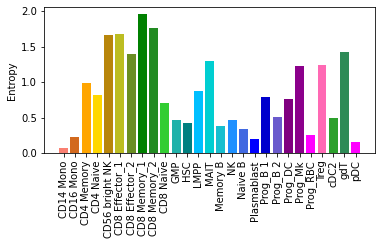

In [11]:
plt.figure(figsize = (5.5,3.5))
plt.bar(cell_types, Entropy_rna.values(), color = ("salmon", "chocolate","orange", "gold", "darkgoldenrod", "tab:olive", "olivedrab", "green", "forestgreen", "limegreen", "lightseagreen", "teal", "deepskyblue", "darkturquoise", "tab:cyan", "dodgerblue", "royalblue", "blue", "mediumblue", "slateblue", "purple", "darkmagenta", "magenta", "hotpink", "tab:green", "seagreen", "fuchsia"))
plt.xticks(rotation = 90)
plt.ylabel("Entropy")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Curriculars/AACB_course_project/entropy_rna.png", dpi = 300, fmt = 'png')

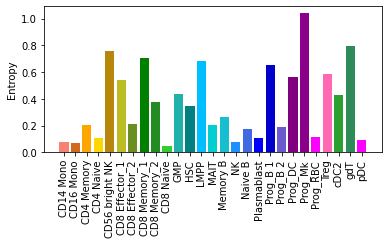

In [12]:
plt.figure(figsize = (5.5,3.5))
plt.bar(cell_types, Entropy_orig.values(), color = ("salmon", "chocolate","orange", "gold", "darkgoldenrod", "tab:olive", "olivedrab", "green", "forestgreen", "limegreen", "lightseagreen", "teal", "deepskyblue", "darkturquoise", "tab:cyan", "dodgerblue", "royalblue", "blue", "mediumblue", "slateblue", "purple", "darkmagenta", "magenta", "hotpink", "tab:green", "seagreen", "fuchsia"))
plt.xticks(rotation = 90)
plt.ylabel("Entropy")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Curriculars/AACB_course_project/entropy_orig.png", dpi = 300, fmt = 'png')

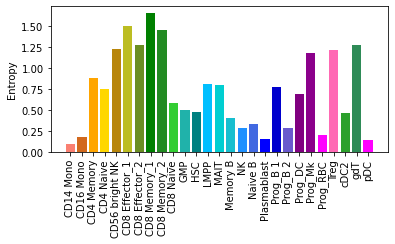

In [13]:
plt.figure(figsize = (5.5,3.5))
plt.bar(cell_types, Entropy_pred.values(), color = ("salmon", "chocolate","orange", "gold", "darkgoldenrod", "tab:olive", "olivedrab", "green", "forestgreen", "limegreen", "lightseagreen", "teal", "deepskyblue", "darkturquoise", "tab:cyan", "dodgerblue", "royalblue", "blue", "mediumblue", "slateblue", "purple", "darkmagenta", "magenta", "hotpink", "tab:green", "seagreen", "fuchsia"))
plt.xticks(rotation = 90)
plt.ylabel("Entropy")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Curriculars/AACB_course_project/entropy_pred.png", dpi = 300, fmt = 'png')

In [14]:
Info_gain_rna_orig = {i:0 for i in cell_types}
Info_gain_rna_pred = {i:0 for i in cell_types}
for i in cell_types:
    Info_gain_rna_orig[i] = Entropy_rna[i] - Entropy_orig[i]
    Info_gain_rna_pred[i] = Entropy_rna[i] - Entropy_pred[i]


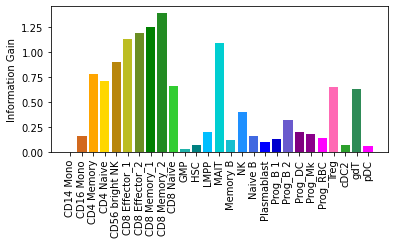

In [15]:
plt.figure(figsize = (5.5,3.5))
plt.bar(cell_types, Info_gain_rna_orig.values(), color = ("salmon", "chocolate","orange", "gold", "darkgoldenrod", "tab:olive", "olivedrab", "green", "forestgreen", "limegreen", "lightseagreen", "teal", "deepskyblue", "darkturquoise", "tab:cyan", "dodgerblue", "royalblue", "blue", "mediumblue", "slateblue", "purple", "darkmagenta", "magenta", "hotpink", "tab:green", "seagreen", "fuchsia"))
plt.xticks(rotation = 90)
plt.ylabel("Information Gain")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Curriculars/AACB_course_project/Info_gain_rna_orig.png", dpi = 300, fmt = 'png')

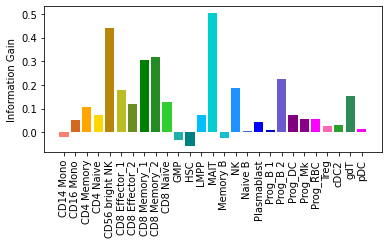

In [16]:
plt.figure(figsize = (5.5,3.5))
plt.bar(cell_types, Info_gain_rna_pred.values(), color = ("salmon", "chocolate","orange", "gold", "darkgoldenrod", "tab:olive", "olivedrab", "green", "forestgreen", "limegreen", "lightseagreen", "teal", "deepskyblue", "darkturquoise", "tab:cyan", "dodgerblue", "royalblue", "blue", "mediumblue", "slateblue", "purple", "darkmagenta", "magenta", "hotpink", "tab:green", "seagreen", "fuchsia"))
plt.xticks(rotation = 90)
plt.ylabel("Information Gain")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Curriculars/AACB_course_project/Info_gain_rna_pred.png", dpi = 300, fmt = 'png')